In [0]:
from google.colab import drive
import os
import sys
drive.mount('/content/drive')
dep_path = os.getcwd()+'/drive/My Drive/datasets'
sys.path.insert(0, "/content/drive/My Drive/datasets/")
os.listdir(dep_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['cifar-10-batches-py',
 'mnist',
 'fashion',
 'Digital_Music_5.json',
 'News_Category_Dataset_v2.json',
 'large_imbd',
 'Consumer_Complaints.csv',
 'clustering',
 'load_mnist.py',
 '__pycache__']

In [0]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from numpy.random import random_sample
from math import sqrt, log
import glob

In [0]:
fl = dict()

####Audio

In [0]:
load = np.load(dep_path+"/clustering/mfcc_features.npy").item()
X = np.array(load['mfcc'],dtype = np.float32)
Y = np.array(load['label'])
num_classes = 41

##### iris dataset

In [0]:
X = load_iris().data
Y = load_iris().target
num_classes = 3

##### Yeast dataset

In [0]:
import csv
with open(dep_path+'/clustering/yeast_csv.csv', 'r') as f:
    yeast = list(csv.reader(f, delimiter=','))
X = np.array(yeast)
#labels
Y = X[1:,-1]
#features
X = X[1:,:-2].astype(np.float32)
num_classes = np.unique(np.array(yeast)[:,-1]).shape[0]-1
print(num_classes)


##### Glass dataset

In [0]:
import csv
with open(dep_path+'/clustering/glass.csv', 'r') as f:
    yeast = list(csv.reader(f, delimiter=','))
X = np.array(yeast)
#labels
Y = X[1:,-1]
#features
X = X[1:,:-1].astype(np.float32)
num_classes = np.unique(np.array(yeast)[:,-1]).shape[0]
print(num_classes)

7


In [0]:
X.shape

(214, 9)

#### MNIST 

In [0]:
import csv
import os
import load_mnist
_,Y,_,_ = load_mnist.load_mnist_dataset(dep_path+'/mnist')
with open(dep_path+'/clustering/encode_stack100.csv', 'r') as f:
    yeast = list(csv.reader(f, delimiter=','))
X = np.array(yeast)
X = X.astype(np.float32)`
num_classes = 10
print(num_classes)

#### MNIST PCA

In [0]:
import load_mnist
import os
mnist = dict()
mnist['train_x'],mnist['train_y'],mnist['test_x'],mnist['test_y'] = load_mnist.load_mnist_dataset(dep_path+'/mnist')
X = mnist['train_x'].reshape(-1,28*28)
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(X.astype(np.float32))
X = data
Y = mnist['train_y']
num_classes = 10
print(X.shape)

#### Max iter range

In [0]:
kmax=max_k=15

### Preprocessing

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### K-Means using Elbow 

In [0]:
def get_cluster_centers(l,x):
    c = []
    for i in np.unique(l):
        index = np.argwhere(l==i).reshape(-1)
        cls = np.take(x,index,axis=0)
        #print(cls.shape)
        c.append(cls.mean(axis=0).tolist())
        #print(c[i])
    return c

def get_inertia(l,x):
    sse = 0
    c = np.array(get_cluster_centers(l,x))
    c = c.reshape(c.shape[0],-1,c.shape[1])
    for i in np.unique(l):
        index = np.argwhere(l==i).reshape(-1)
        cls = np.take(x,index,axis=0)
        #print(cls.shape)
        cls = ((cls-c)**2).sum(axis=2)
        print(cls.shape)
        cls = cls.min(axis=0).sum()
        #print(cls)
        sse+=cls
    return sse

In [0]:
kmeans = KMeans(n_clusters=4, max_iter=1000, n_jobs = -1).fit(X)
kmeans.inertia_,get_inertia(kmeans.labels_,X)

(4, 122)
(4, 19)
(4, 33)
(4, 40)


(23.71005632023198, 23.71005624187301)

for cluster K  : 1
for cluster K  : 2
for cluster K  : 3
for cluster K  : 4
for cluster K  : 5
for cluster K  : 6
for cluster K  : 7
for cluster K  : 8
for cluster K  : 9
for cluster K  : 10
for cluster K  : 11
for cluster K  : 12
for cluster K  : 13
for cluster K  : 14
for cluster K  : 15
(6, 70)
(6, 76)
(6, 17)
(6, 13)
(6, 9)
(6, 29)


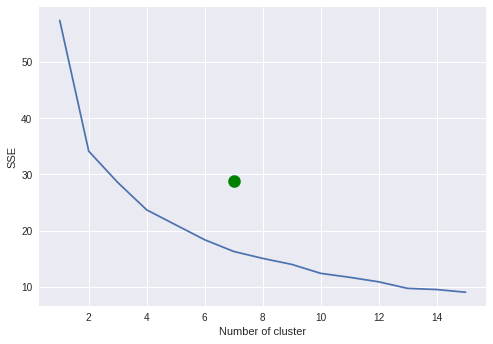

In [0]:
sse = {}
for k in range(1, kmax+1):
    print("for cluster K  : {}".format(k))
    kmeans = KMeans(n_jobs = -1,n_clusters=k, max_iter=1000).fit(X)
    labels = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

fl['sse'] = sse
fl['sse_c'] =  get_inertia(Y,X)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.scatter( num_classes, fl['sse_c'],s=150, c='g')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


(6, 70)
(6, 76)
(6, 17)
(6, 13)
(6, 9)
(6, 29)


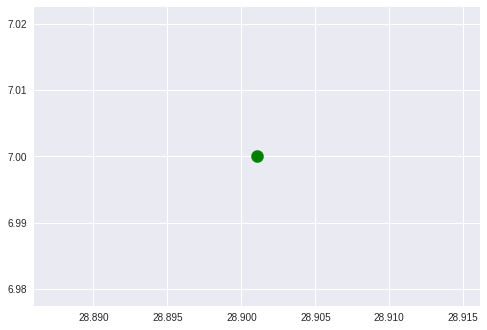

In [0]:

plt.scatter(get_inertia(Y,X), num_classes, s=150, c='g')

### K means using Silhouette scores

For cluster : 2, The Silhouette Coefficient is 0.524
For cluster : 3, The Silhouette Coefficient is 0.526
For cluster : 4, The Silhouette Coefficient is 0.361
For cluster : 5, The Silhouette Coefficient is 0.372
For cluster : 6, The Silhouette Coefficient is 0.382
For cluster : 7, The Silhouette Coefficient is 0.384
For cluster : 8, The Silhouette Coefficient is 0.368
For cluster : 9, The Silhouette Coefficient is 0.39
For cluster : 10, The Silhouette Coefficient is 0.391
For cluster : 11, The Silhouette Coefficient is 0.399
For cluster : 12, The Silhouette Coefficient is 0.349
For cluster : 13, The Silhouette Coefficient is 0.244
For cluster : 14, The Silhouette Coefficient is 0.325
For cluster : 15, The Silhouette Coefficient is 0.271


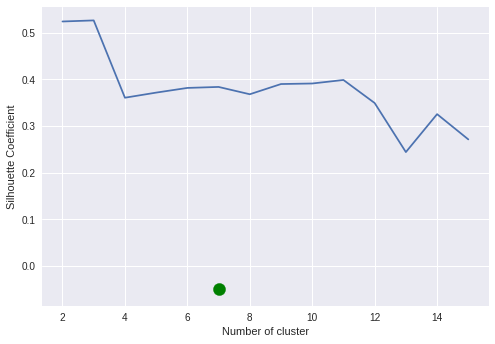

In [0]:

silhouette_coeff = {}

for n_cluster in range(2, kmax+1):
    kmeans = KMeans(n_jobs=-1,n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silhouette_coeff[n_cluster] = sil_coeff
    print("For cluster : {}, The Silhouette Coefficient is {:.3}".format(n_cluster, sil_coeff))

fl['silh'] = silhouette_coeff
fl['silh_c'] = silhouette_score(X, Y, metric='euclidean')
plt.figure()
plt.plot(list(silhouette_coeff.keys()), list(silhouette_coeff.values()))
plt.scatter( num_classes, fl['silh_c'],s=150, c='g')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()



### K mean GAP statistics 

#### Plot the N-cluster against GAP values

In [0]:

def get_rand_data(col):

    rng = col.max() - col.min()

    return pd.Series(random_sample(len(col))*rng + col.min())



def iter_kmeans(df, n_clusters, num_iters=5):

    rng =  range(1, num_iters + 1)
    vals = pd.Series(index=rng)
    for i in rng:
        k = KMeans(n_jobs=-1,n_clusters=n_clusters, n_init=3)
        k.fit(df)
        #print ("Ref k: {}".format(k.get_params()['n_clusters']))
        vals[i] = k.inertia_
    return vals



def gap_statistic(df, max_k=10):
    gaps = pd.Series(index = range(1, max_k + 1))
    for k in range(1, max_k + 1):
        km_act = KMeans(n_jobs=-1,n_clusters=k, n_init=3)
        km_act.fit(df)
        # get ref dataset
        ref = df.apply(get_rand_data)
        ref_inertia = iter_kmeans(ref, n_clusters=k).mean()
        gap = log(ref_inertia - km_act.inertia_)
        print("Ref: {} Act: {}  Gap: {}".format( ref_inertia, km_act.inertia_, gap))
        gaps[k] = gap
    return gaps

In [0]:
# famous iris data set
df = pd.DataFrame(X)
gaps = gap_statistic(df,kmax)

Ref: 163.31458464649535 Act: 57.364233852875884  Gap: 4.6629705956443575
Ref: 146.4036089667155 Act: 34.13199299586968  Gap: 4.720921077979337
Ref: 130.77856932297792 Act: 28.585246725652357  Gap: 4.6268663390139935
Ref: 126.29654401265188 Act: 24.15035926300978  Gap: 4.626404971076568
Ref: 118.01798038145321 Act: 21.757603208384094  Gap: 4.567056782141431
Ref: 110.44744802188072 Act: 18.399580694769856  Gap: 4.522308738775283
Ref: 108.9965340047549 Act: 16.663218927943042  Gap: 4.52540501979515
Ref: 99.0468022114903 Act: 15.547603608676086  Gap: 4.4248370342396655
Ref: 97.57912501492545 Act: 13.70575032620227  Gap: 4.4293082173243405
Ref: 92.26678864454834 Act: 12.876561531750594  Gap: 4.374375276455915
Ref: 94.2384631809739 Act: 12.235370814421506  Gap: 4.406756958340406
Ref: 92.34797426989721 Act: 10.919695166252096  Gap: 4.399722621811603
Ref: 87.65986223920076 Act: 10.163785552172028  Gap: 4.3502273116847165
Ref: 86.55875006012226 Act: 9.49063444227384  Gap: 4.344689649223031
Ref:

In [0]:
gap = np.array(gaps)
fl['gap'] = gap
fl['gap_c'] = log( iter_kmeans(df.apply(get_rand_data), n_clusters=num_classes).mean() - get_inertia(Y,X))
print(fl['gap_c'])
gap.argmax()+1

(6, 70)
(6, 76)
(6, 17)
(6, 13)
(6, 9)
(6, 29)
4.374436300442958


2

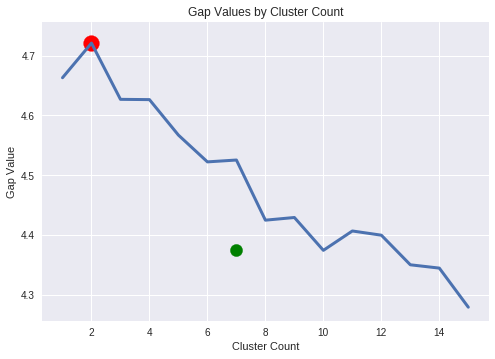

In [0]:
plt.plot(range(1,kmax+1),gap, linewidth=3)
plt.scatter(gap.argmax()+1, gap.max(), s=250, c='r')
plt.scatter( num_classes, fl['gap_c'],s=150, c='g')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### 4.  Calinski-Harabaz Index 

In [0]:
CHI = pd.Series(index = range(2, max_k + 1))
for k in range(2, max_k+1):
    kmeans = KMeans(n_jobs=-1,n_clusters=k, max_iter=1000).fit(X)
    labels = kmeans.labels_
    #print(data["clusters"])
    CHI[k] = metrics.calinski_harabaz_score(X, labels) 

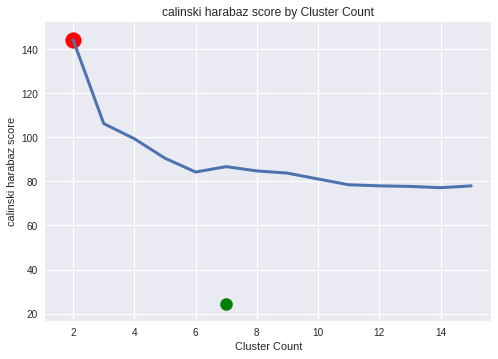

In [0]:
fl['chi'] = CHI
fl['chi_c'] = metrics.calinski_harabaz_score(X, Y) 
plt.plot(CHI, linewidth=3)
plt.scatter(CHI.values.argmax()+2, CHI.max(), s=250, c='r')
plt.scatter( num_classes, fl['chi_c'],s=150, c='g')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('calinski harabaz score')
plt.title('calinski harabaz score by Cluster Count')
plt.show()

In [0]:
name = os.getcwd()+"/drive/My Drive/outputs/"+"Kmeans_gl.npy"
np.save(name,fl)
#saving file from colab
"""from google.colab import files
files.download(name)"""


'from google.colab import files\nfiles.download(name)'

In [0]:
fl.keys()

dict_keys(['sse', 'sse_c', 'silh', 'silh_c', 'gap', 'gap_c', 'chi', 'chi_c'])

['.config', 'drive', 'sample_data']